# Analysis of Aircraft Incident Frequencies by Make and Model: Identifying Low-Risk Aircraft for Commercial and Private Operations

## Introduction

This project analyzes Aviation Data collected between 1962 and 2023 to come up with useful insights to guide a company towards finding the lowest risk aircrafts for a new endeavor.

## Business Problem

Our company is poised to enter the aviation industry by purchasing and managing aircraft for both private and commercial usage, with the goal of expanding its portfolio. Given the inherent dangers associated with aviation, it is imperative to comprehend these risks in order to make well-informed judgments. In order to ensure a safe and successful launch into the market, this project aims to deliver a data-driven examination of aviation safety with a particular focus on finding the lowest-risk aircraft.

## Data Understanding 

The data used in this project is a dataset from the **National Transportation Safety Board** that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

The dataset contains 31 attributes and 88889 records. 

For the purpose of this analysis, the data was filtered to remain with the attributes and records that were relevant.

Here is a breakdown of the attributes and what they represent:

### Data Importation

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data from its directory
aviation = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)
#aviation.head(10)

In [47]:
# Examine the data to identify its shape, and how many missing values are therein
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

###  Data Cleaning

This section involves:

- Removing irrelevant columns
- Handling of missing data
- Data Transformation

- Removing irrelevant columns

In [48]:
# Remove irrelevant columns to remain witha smaller dataset
irrelevant_columns = ['Publication.Date', 'Report.Status', 'Engine.Type', 'Number.of.Engines', 'Amateur.Built', 'Registration.Number', 'Aircraft.damage',
                      'Airport.Name', 'Airport.Code', 'Accident.Number', 'Investigation.Type', 'Event.Id', 'Country', 'Weather.Condition']
aviation= aviation.drop(columns=irrelevant_columns)

- Handling of missing data

From the dataset above , there are several columns with a high percentage of missing values. 

In [49]:
# Use a threshold of 50% to drop columns with a higher percentage of missing values
threshold = 50
missing_percentage = aviation.isnull().mean() *100
columns_to_drop = missing_percentage[missing_percentage > threshold].index
aviation = aviation.drop(columns=columns_to_drop)
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Purpose.of.flight       82697 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(4), object(7)
memory usage: 7.5+ MB


In [50]:
#Drop the missing rows in the 'Event.Date' column to remain with relevant data

aviation= aviation.dropna(axis=0, subset= ['Event.Date'])
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Purpose.of.flight       82697 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


The 'Broad.Phase.of.Flight' has many missing records. However, dropping these records will result in losing alot of meaningful data, including the date of incidence occurence. The missing values will thus be replaced with 'Unknown' for the purpose of data completeness

In [51]:
# Replace the missing values in the column with 'Unknown'
aviation['Broad.phase.of.flight'] = aviation['Broad.phase.of.flight'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Purpose.of.flight       82697 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


Next, the NaN values in the 'Purpose.of.flight' column will be replaced with the string 'Unknown' to ensure data completeness. These will not be dropped since they are few, and will not interfere with the integrity of the data. The same will be done for the 'Location', 'Model', 'Injury.Severity' and 'Make' columns.

In [52]:
# Replace the missing values in the column with 'Unknown'
aviation['Purpose.of.flight'] = aviation['Purpose.of.flight'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88797 non-null  object 
 5   Purpose.of.flight       88889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


In [53]:
# Replace the missing values in the column with 'Unknown'
aviation['Model'] = aviation['Model'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88837 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88889 non-null  object 
 5   Purpose.of.flight       88889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


In [54]:
# Replace the missing values in the column with 'Unknown'
aviation['Location'] = aviation['Location'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88889 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88826 non-null  object 
 4   Model                   88889 non-null  object 
 5   Purpose.of.flight       88889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


In [55]:
# Replace the missing values in the column with 'Unknown'
aviation['Make'] = aviation['Make'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88889 non-null  object 
 2   Injury.Severity         87889 non-null  object 
 3   Make                    88889 non-null  object 
 4   Model                   88889 non-null  object 
 5   Purpose.of.flight       88889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


In [56]:
# Replace the missing values in the column with 'Unknown'
aviation['Injury.Severity'] = aviation['Injury.Severity'].fillna('Unknown')
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              88889 non-null  object 
 1   Location                88889 non-null  object 
 2   Injury.Severity         88889 non-null  object 
 3   Make                    88889 non-null  object 
 4   Model                   88889 non-null  object 
 5   Purpose.of.flight       88889 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Broad.phase.of.flight   88889 non-null  object 
dtypes: float64(4), object(7)
memory usage: 8.1+ MB


Next, missing values in the 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', and 'Total.Uninjured' columns will be handled by replacing them with the median for their respective columns

In [57]:
# Compute the median for each of the 4 columns
median_fatal_injuries = aviation['Total.Fatal.Injuries'].median()
median_serious_injuries = aviation['Total.Serious.Injuries'].median()
median_minor_injuries = aviation['Total.Minor.Injuries'].median()
median_uninjuired = aviation['Total.Uninjured'].median()

In [58]:
# Impute the median values for the 4 columns
aviation['Total.Fatal.Injuries'] = aviation['Total.Fatal.Injuries'].fillna(median_fatal_injuries)
aviation['Total.Serious.Injuries'] = aviation['Total.Serious.Injuries'].fillna(median_serious_injuries)
aviation['Total.Minor.Injuries'] = aviation['Total.Minor.Injuries'].fillna(median_minor_injuries)
aviation['Total.Uninjured'] = aviation['Total.Uninjured'].fillna(median_uninjuired)

- Data Transformation

In [59]:
#Convert 'Event.Date' to datetime
aviation['Event.Date'] = pd.to_datetime(aviation['Event.Date'])
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88889 non-null  datetime64[ns]
 1   Location                88889 non-null  object        
 2   Injury.Severity         88889 non-null  object        
 3   Make                    88889 non-null  object        
 4   Model                   88889 non-null  object        
 5   Purpose.of.flight       88889 non-null  object        
 6   Total.Fatal.Injuries    88889 non-null  float64       
 7   Total.Serious.Injuries  88889 non-null  float64       
 8   Total.Minor.Injuries    88889 non-null  float64       
 9   Total.Uninjured         88889 non-null  float64       
 10  Broad.phase.of.flight   88889 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 8.1+ MB


In [60]:
#Export the cleaned data to excel for visualization in Tableau
aviation.to_excel('cleaned_aviation_data.xlsx', index=False)

## Risk Analysis and Identification

Now to be able to establish which aircrafts are the lowest risk for the company to begin this endeavor, we need to carry out some analysis

In particular, this session will look into:

- Analysis of Injury Severity by Aircraft Make and Model

- Survivability Analysis by Aircraft Make

- Incident Frequency by Aircraft Make

- Time Trend Analysis of Incidents

- Injury Severity by Broad Phase of Flight

- Analysis of risks associated with Purpose of Flight


###  Analysis of injury severity by Aircraft Make and Model

This analysis aims to find out which makes and models of aircraft have the highest and lowest rates of major, minor, and fatal injuries.

In [61]:
# Calculate the sum of injuries by make and model and store in a new dataframe
injury_info = aviation.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()

injury_info.head()

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,107.5 Flying Corporation,One Design DR 107,1.0,0.0,0.0
1,1200,G103,0.0,1.0,0.0
2,177MF LLC,PITTS MODEL 12,0.0,2.0,0.0
3,1977 Colfer-chan,STEEN SKYBOLT,0.0,0.0,1.0
4,1st Ftr Gp,FOCKE-WULF 190,1.0,0.0,0.0


In [62]:
#create a new column in the new dataframe to show the total injuries
injury_info['Total_Injuries'] = injury_info[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
#injury_info.head()

In [63]:
#Sort by 'Total_Injuries' to determine the aircrafts with the lowest risk

low_risk_models = injury_info.sort_values(by = 'Total_Injuries')
low_risk_models.head(10)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total_Injuries
10646,Hispano Aviacion,HA200,0.0,0.0,0.0,0.0
5377,CONSOLIDATED AERONAUTICS INC.,LAKE LA 4 200,0.0,0.0,0.0,0.0
15460,Pitts,S1T,0.0,0.0,0.0,0.0
15464,Pitts,S2S,0.0,0.0,0.0,0.0
5374,CONSOLIDATED AERONAUTICS,LAKE LA4-200,0.0,0.0,0.0,0.0
5373,CONSOLIDATED AERONAUTICS INC.,LAKE LA-4,0.0,0.0,0.0,0.0
5372,CONRAD THEODORE J,THORP T-18,0.0,0.0,0.0,0.0
5371,CONNER LEROY,RV6A,0.0,0.0,0.0,0.0
12059,Let,L 33 Solo,0.0,0.0,0.0,0.0
8949,Flurry,AVENTURA II,0.0,0.0,0.0,0.0


In [64]:
#Sort by 'Total_Injuries' to determine the aircrafts makes and models with the highest risk

high_risk_models = injury_info.sort_values(by = 'Total_Injuries', ascending = False).head(10)

In [65]:
#Export the data to excel for visualization in Tableau
low_risk_models.to_excel('aviation_risk_data.xlsx', index=False)

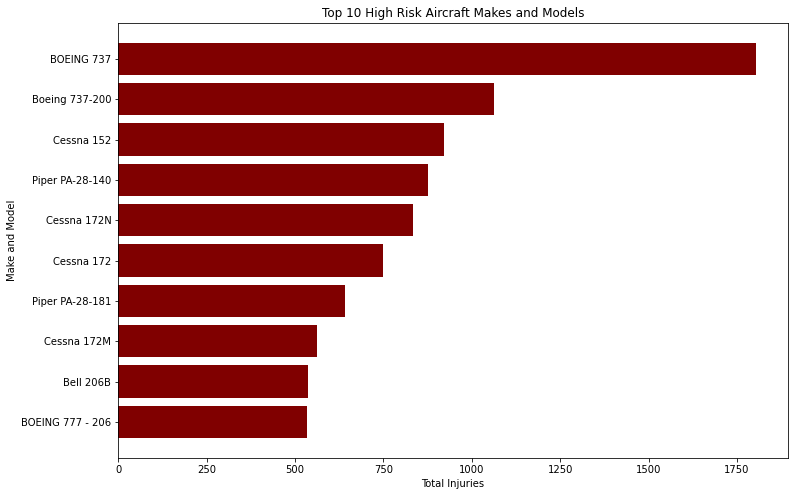

In [66]:
# Plotting the data
# High Risk Models
plt.figure(figsize=(12, 8))

plt.barh(high_risk_models['Make'] + ' ' + high_risk_models['Model'], high_risk_models['Total_Injuries'], color='maroon')
plt.xlabel('Total Injuries')
plt.ylabel('Make and Model')
plt.title('Top 10 High Risk Aircraft Makes and Models')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest risk on top

plt.savefig('Top 10 High Risk Aircraft Makes and Models.jpg', format='jpg')

This analysis shows that various models of the Cessna and Piper makes are high risk, in that they have caused the most number of injuries. Certain traits, such as older designs, higher usage rates, or involvement in particular flight types (e.g., commercial or high-stress contexts), may be shared by high-risk models. This will be further investigated.

This analysis also demonstrates that various models of the Cirrus and Cernia makes have no recorded injuries, which means they are very low risk makes. In low-stress or private flight circumstances, where the likelihood of severe incidents is lower, low-risk models might be utilized more frequently. It is also assumed that these models may be better maintained than the high-risk ones, or they may be more recent versions with enhanced safety measures.

### Survivability Analysis by Aircraft Make 

This analysis aims to find out which aircraft makes have the best survivability rates—that is, the highest percentage of passengers who escape injury unharmed.

In [67]:
#Calculate the statistics of uninjured persons, by make and model

survivor_info = aviation.groupby(['Make'])['Total.Uninjured'].sum().reset_index()

In [68]:
# Sort the survivor_info dataframe by 'Total.Uninjured'

highest_survivability_aircrafts = survivor_info.sort_values(by = 'Total.Uninjured', ascending = False).head(15)

In [69]:
#Export the data to excel for visualization in Tableau
highest_survivability_aircrafts.to_excel('highest_survivability_aircrafts.xlsx', index = False)

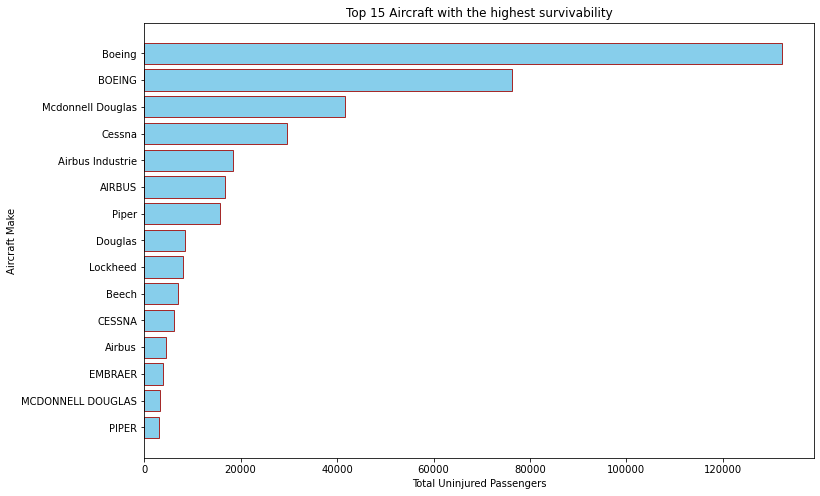

<Figure size 432x288 with 0 Axes>

In [91]:
# Plot the aircraft makes with the highest survivability rates
plt.figure(figsize=(12, 8))
plt.barh(highest_survivability_aircrafts['Make'] , highest_survivability_aircrafts['Total.Uninjured'], color='skyblue', edgecolor = 'brown')

plt.xlabel('Total Uninjured Passengers')
plt.ylabel('Aircraft Make')
plt.title('Top 15 Aircraft with the highest survivability')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

plt.savefig('Top 15 Aircraft with the highest survivability.png', format='png')

This analysis shows that Boeing has the highest survivability rates, and the previous analysis has not listed it as one of the top 10 high risk aircraft makes. 

This implies that the crew and passengers are well protected by their aircraft designs in the event of an incident. This may be due to superior safety features, robust construction, and effective emergency systems.

###  Incident Frequency by Aircraft Make

With this analysis, we will identify which aircraft makes are involved in the fewest or most incidents.

In [71]:
# Group by 'Make' and count incidents
# Convert the Series to a DataFrame and name the count column Incident.Count.

plane_make_incident_counts = aviation.groupby(['Make']).size().reset_index(name='Incident.Count')
plane_make_incident_counts.head()

,Make,Incident.Count
0,107.5 Flying Corporation,1
1,1200,1
2,177MF LLC,1
3,1977 Colfer-chan,1
4,1st Ftr Gp,1


In [72]:
# Sort by the Incident.Count column in descending order to bring the models with the most incidents to the top.
most_incidents_aircraft_makes = plane_make_incident_counts.sort_values(by = 'Incident.Count', ascending = False).head(15)

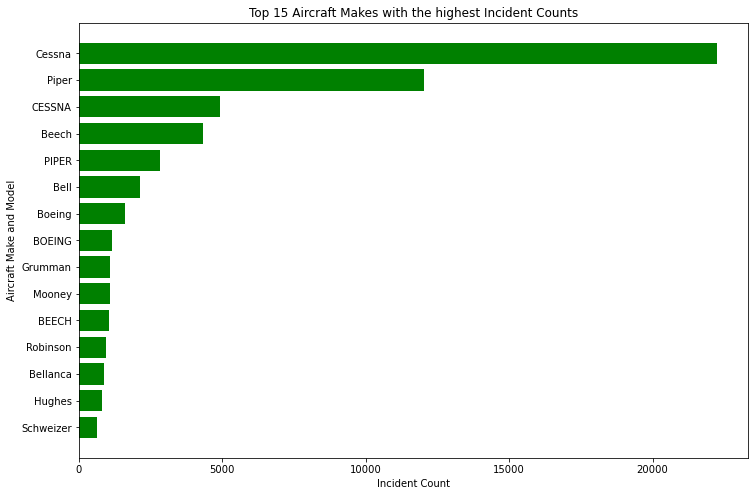

<Figure size 432x288 with 0 Axes>

In [73]:
# Plot using matplotlib
plt.figure(figsize=(12, 8))
plt.barh(most_incidents_aircraft_makes['Make'] , most_incidents_aircraft_makes['Incident.Count'], color='green')

plt.xlabel('Incident Count')
plt.ylabel('Aircraft Make and Model')
plt.title('Top 15 Aircraft Makes with the highest Incident Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

plt.savefig('Top 15 Aircraft Makes with the highest Incident Counts.jpg', format='jpg')

This analysis demonstrates that the Cessna and Piper aircraft makes have the most incident counts. From the first analysis, these two makes were also observed to be the most high risk aircraft makes. For the new venture the company plans to go into, these two models may not be the best to be considered.

In [74]:
# Sort by the Incident.Count column in ascending order to bring the models with the fewest incidents to the top.
fewest_incidents_aircraft_make = plane_make_incident_counts.sort_values(by = 'Incident.Count')
fewest_incidents_aircraft_make

,Make,Incident.Count
0,107.5 Flying Corporation,1
5170,Mingess-bennett,1
5169,Miner,1
5168,Mince,1
5167,Miltenberger,1
...,...,...
5608,PIPER,2841
936,Beech,4330
1320,CESSNA,4922
5795,Piper,12029


In [75]:
#Export the data to excel for visualization in Tableau
fewest_incidents_aircraft_make.to_excel('fewest_incidents_aircraft_makes.xlsx', index=False)

In [76]:
#Export the data to excel for visualization in Tableau
most_incidents_aircraft_makes.to_excel('Aircraft_makes_with_most_incidents.xlsx', index = False)

### Time Trend Analysis of Incidents

With this analysis, we shall examine the temporal patterns to determine the number of people involved in incidents per year, and how this has changed over time

In [77]:
#Extract the year from the 'Event.Date' column
aviation['Year'] = aviation['Event.Date'].dt.year

In [78]:
# Filter the DataFrame to include only incidents from 1982 onwards
aviation_filtered = aviation[aviation['Year'] >= 1982]

#Count incidents per year
temporal_incident_info = aviation_filtered.groupby(['Year']).size().reset_index(name='Incident.Count')

In [79]:
temporal_incident_info.to_excel('temporal_incident_info.xlsx', index = False)

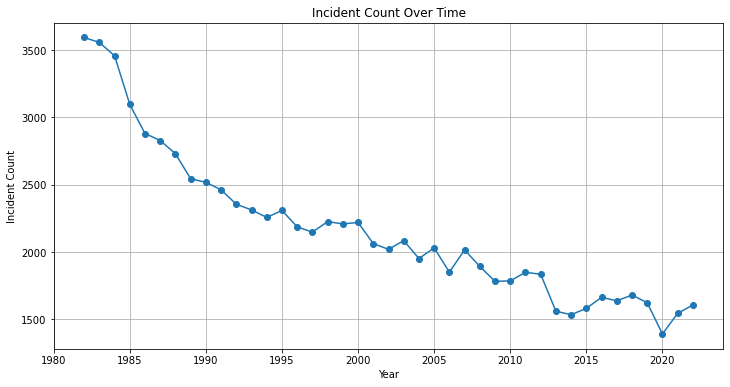

<Figure size 432x288 with 0 Axes>

In [80]:
# Plot the temporal incident information using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(temporal_incident_info['Year'], temporal_incident_info['Incident.Count'], marker='o')

plt.xlabel('Year')
plt.ylabel('Incident Count')
plt.title('Incident Count Over Time')
plt.grid(True)
plt.show()

plt.savefig('Incident Count Over Time.jpg', format='jpg')

The trend analysis shows that airplane incidents have been on a gradual decline over the years. This can be attributed to various factors including advanced technology that enhances crew and passenger safety, better maintenance strategies, improved air traffic management, among other factors.

### 2.5 Injury Severity by Broad Phase of Flight

This analysis will investigate which flight phases—such as takeoff, cruise, and landing—seem to cause the greatest injuries.

In [81]:
#Calculate injury statistics by Phase of Flight
phase_info = aviation.groupby('Broad.phase.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()

phase_info.head()

,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,Approach,3842.0,1920.0,2526.0
1,Climb,1762.0,606.0,962.0
2,Cruise,6173.0,2183.0,4531.0
3,Descent,913.0,473.0,998.0
4,Go-around,587.0,388.0,622.0


In [82]:
#Create a new column in the new dataframe to show the total injuries
phase_info['Total.Injuries'] = phase_info[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)

In [83]:
#Sort by the Total.Injuries column in ascending order.
phase_info = phase_info.sort_values(by = 'Total.Injuries')
# # Filter the DataFrame to exclude records with 'Unknown' values
phase_info = phase_info[phase_info['Broad.phase.of.flight'] != 'Unknown']
phase_info

,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
7,Other,85.0,13.0,21.0,119.0
10,Taxi,102.0,111.0,501.0,714.0
8,Standing,161.0,241.0,397.0,799.0
4,Go-around,587.0,388.0,622.0,1597.0
3,Descent,913.0,473.0,998.0,2384.0
1,Climb,1762.0,606.0,962.0,3330.0
5,Landing,518.0,1234.0,3209.0,4961.0
0,Approach,3842.0,1920.0,2526.0,8288.0
6,Maneuvering,5323.0,1912.0,1980.0,9215.0
9,Takeoff,4304.0,3138.0,4955.0,12397.0


In [84]:
#Export the data to excel for visualization in Tableau
phase_info.to_excel('phase_info.xlsx', index = False)

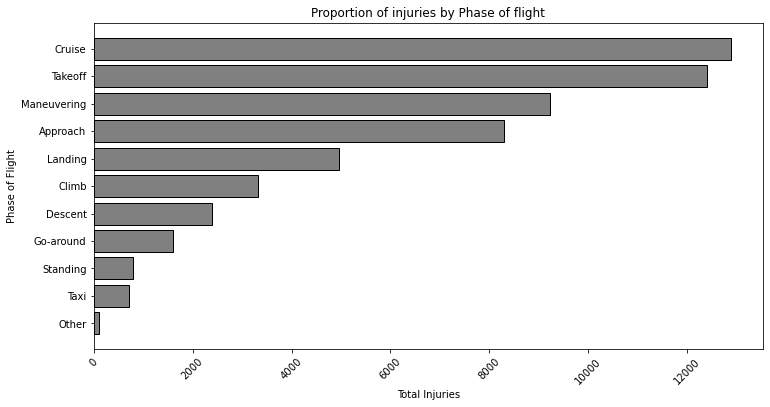

<Figure size 432x288 with 0 Axes>

In [85]:
#Visualize the number of injuries that have occurred in various phases of flight
# Plot using matplotlib
plt.figure(figsize=(12, 6))
plt.barh(phase_info['Broad.phase.of.flight'], phase_info['Total.Injuries'], color='grey', edgecolor='black')

plt.xlabel('Total Injuries')
plt.ylabel('Phase of Flight')
plt.title('Proportion of injuries by Phase of flight')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Proportion of injuries by Phase of flight.jpg', format='jpg')

The analysis to understand the relation between phase of flight and total injuries reveals that most passenger injuries occur during the cruise and take-off phases. A fairly large portion of injuries also occur in the maneuvering and approach phases. 

This analysis therefore higlights the importance of focusing on safety during the takeoff, cruise, maneuvering and approach phases of flight.

###  Analysis of risks associated with Purpose of Flight

This analysis looks into the risk associated with different purposes of flights (e.g., commercial, private).

In [86]:
#Calculate injury statistics by Purpose of Flight
purpose_info = aviation.groupby('Purpose.of.flight').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()

In [87]:
#Create a new column in the new dataframe to show the total injuries
purpose_info['Total.Injuries'] = purpose_info[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1)
purpose_info

,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
0,ASHO,14.0,1.0,0.0,15.0
1,Aerial Application,549.0,595.0,794.0,1938.0
2,Aerial Observation,414.0,318.0,321.0,1053.0
3,Air Drop,10.0,4.0,2.0,16.0
4,Air Race show,42.0,16.0,20.0,78.0
5,Air Race/show,34.0,21.0,10.0,65.0
6,Banner Tow,19.0,31.0,10.0,60.0
7,Business,2313.0,881.0,1106.0,4300.0
8,Executive/corporate,598.0,143.0,192.0,933.0
9,External Load,39.0,28.0,36.0,103.0


In [88]:
#Export the data to excel for visualization in Tableau
purpose_info.to_excel('purpose_info.xlsx', index = False)

In [89]:
#Sort by the Total.Injuries column in descending order.
purpose_info = purpose_info.sort_values(by = 'Total.Injuries', ascending = False).head(10)
#Filter the DataFrame to exclude records with 'Unknown' values
purpose_info = purpose_info[purpose_info['Purpose.of.flight'] != 'Unknown']
purpose_info

,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries
18,Personal,18762.0,10611.0,12959.0,42332.0
14,Instructional,1913.0,1532.0,2062.0,5507.0
7,Business,2313.0,881.0,1106.0,4300.0
1,Aerial Application,549.0,595.0,794.0,1938.0
15,Other Work Use,511.0,414.0,541.0,1466.0
19,Positioning,635.0,241.0,303.0,1179.0
2,Aerial Observation,414.0,318.0,321.0,1053.0
8,Executive/corporate,598.0,143.0,192.0,933.0
20,Public Aircraft,406.0,189.0,244.0,839.0


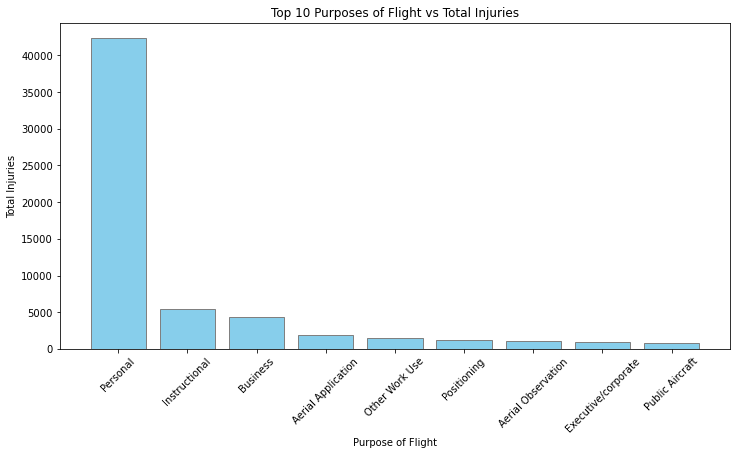

<Figure size 432x288 with 0 Axes>

In [90]:
#Visualize the top 10 purpose of flight that have had most injuries

# Plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(purpose_info['Purpose.of.flight'], purpose_info['Total.Injuries'], color='skyblue', edgecolor='grey')

plt.xlabel('Purpose of Flight')
plt.ylabel('Total Injuries')
plt.title('Top 10 Purposes of Flight vs Total Injuries')
plt.xticks(rotation=45)
plt.show()

plt.savefig('Top 10 Purposes of Flight vs Total Injuries.jpg', format='jpg')

When compared to other flight purposes, personal flights have a much higher total injury rate (42,332).
This implies that personal flights may be the riskiest, most likely as a result of pilots' differing skill levels, less stringent safety regulations, or a greater number of flights.


#  Conclusion

From the analysis conducted on the aviation data, the observations were made:

   1. Cessna and Piper aircraft makes are associated with the highest injury and icident rates
   2. Boeing aircraft have higher survivability rates and are not listed among the top 10 high-risk aircraft makes. 
   3.  The trend analysis shows a gradual decline in airplane incidents over the years, reflecting improvements in aviation technology, safety protocols, and regulatory oversight.
   4. Most injuries occur during Cruise and Take-Off phases, indicating critical points where enhanced safety measures are necessary. 
   5. Personal and Instructional Flight categories have the highest total injuries, indicating they are the most risky.

#  Recommendation

1. **Focus on Low-Risk Models**

For starting the new business endeavor, focusing on acquiring and operating low-risk models is advisable. These models have demonstrated better safety records, lower incidents of severe injuries and high survivability rates. A great example is Boeing. Aircraft makes to steer clear of include Cessna and Piper since these are associated with the highest incidents and injuries.

2. **Risk Management for Private Flights**

Since part of the new endeavor is to purpase and operate aircrafts for private purposes, it is of importance that extra attention be given to risk management strategies when operating private flights, seeing as personal flights are the most risky. 
This may include investing in advanced safety equipment, rigorous training programs, and strict safety protocols.

3. **Enhanced Safety Protocols**

It will be essential to instill a strong safety culture in the company. This covers routine incident investigations, safety audits, and incident reviews.